<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Data-manipulation-and-visualization" data-toc-modified-id="Data-manipulation-and-visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data manipulation and visualization</a></span></li><li><span><a href="#LSTM-Model-building-and-training" data-toc-modified-id="LSTM-Model-building-and-training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LSTM Model building and training</a></span></li><li><span><a href="#Getting-predictions" data-toc-modified-id="Getting-predictions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Getting predictions</a></span></li><li><span><a href="#predicrted-VS-real-values" data-toc-modified-id="predicrted-VS-real-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>predicrted VS real values</a></span></li></ul></div>

# Description
**This program predicts the closing price of Apple stocks using a given look back value with LSTM**


In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


# Data manipulation and visualization

Data set shape: (1446, 6)


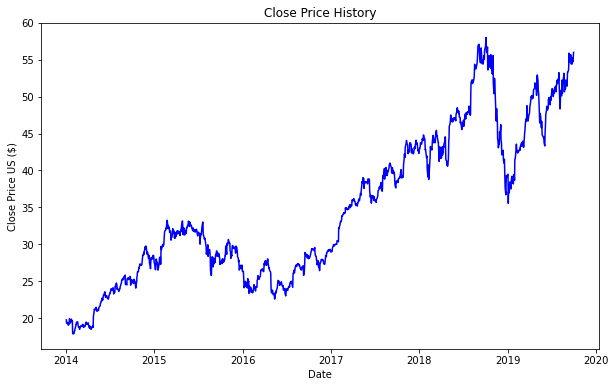

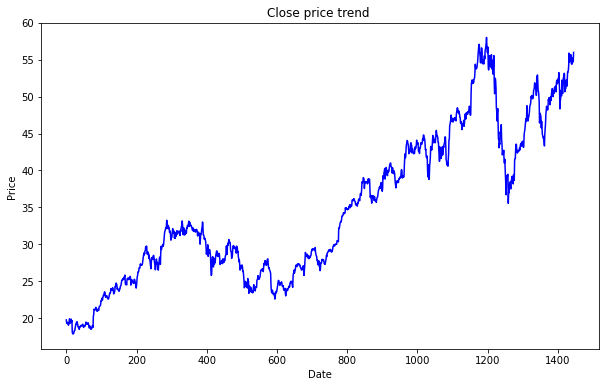

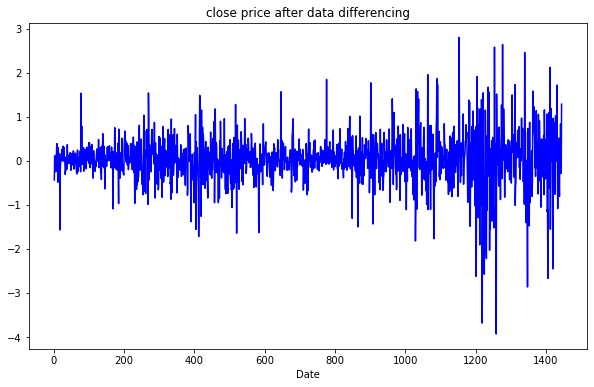

Training set shape: (1156, 1)
Testing set shape: (349, 1)


In [2]:
from utilities.data_manipulation import get_data
x_train, y_train, x_test, y_test, training_data_len, close_df = get_data()


# LSTM Model building and training

In [3]:
from utilities.get_model import get_model
from tensorflow.keras.callbacks import EarlyStopping
model = get_model(x_train)
# training the model
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights = True, verbose=10)
lstm_history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=40,shuffle=False,validation_split=0.1,
                         callbacks=[early_stopping])

Using TensorFlow backend.


Train on 986 samples, validate on 110 samples
Epoch 1/40
986/986 [==============================] - 3s 3ms/step - loss: 0.1836 - MAE: 0.3031 - val_loss: 0.4241 - val_MAE: 0.4648
Epoch 2/40
986/986 [==============================] - 2s 2ms/step - loss: 0.1827 - MAE: 0.3023 - val_loss: 0.4223 - val_MAE: 0.4631
Epoch 3/40
986/986 [==============================] - 2s 2ms/step - loss: 0.1831 - MAE: 0.3032 - val_loss: 0.4224 - val_MAE: 0.4621
Epoch 4/40
986/986 [==============================] - 2s 2ms/step - loss: 0.1822 - MAE: 0.3019 - val_loss: 0.4217 - val_MAE: 0.4609
Epoch 5/40
986/986 [==============================] - 2s 2ms/step - loss: 0.1825 - MAE: 0.3023 - val_loss: 0.4204 - val_MAE: 0.4593
Epoch 6/40
986/986 [==============================] - 2s 2ms/step - loss: 0.1831 - MAE: 0.3029 - val_loss: 0.4215 - val_MAE: 0.4597
Epoch 7/40
986/986 [==============================] - 2s 2ms/step - loss: 0.1829 - MAE: 0.3031 - val_loss: 0.4221 - val_MAE: 0.4603
Epoch 8/40
986/986 [==========

# Getting predictions


In [4]:
from utilities.prediction import predict
validation_df = predict(model.predict(x_test), y_test, training_data_len, close_df)

MSE value: 0.8456669730784593
MAE value: 0.6708175309306932
     predictions  real data
0      52.299887  51.777500
1      51.809961  51.812500
2      51.842069  52.220001
3      52.245282  51.882500
4      51.901968  52.217499
..           ...        ...
284    54.681764  54.419998
285    54.418263  55.257500
286    55.254851  54.972500
287    54.969990  54.705002
288    54.703042  55.992500

[289 rows x 2 columns]


#  predicrted VS real values


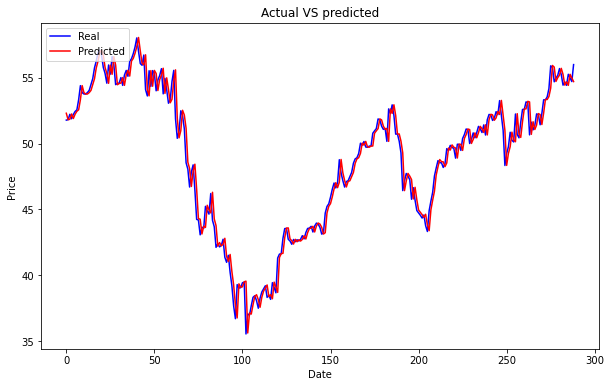

In [6]:
from utilities.visuals import plotting
plotting(validation_df["real data"], title="Actual VS predicted", y_label="Price", 
         data2=validation_df['predictions'], legend_d1="Real", legend_d2="Predicted", save_plot=False, plot_name="test.png")